## Crop Border

This is the technique to crop the white borders of an image.

In [1]:
import cv2 
import os
from matplotlib import pyplot as plt 
import numpy as np
import math

#### Define image path

In [69]:
filepath = os.path.join('.', 'squared', 'IMG_0130.png')
filename = os.path.basename(filepath).split('.')[0]

filename

'IMG_0130'

#### Read image

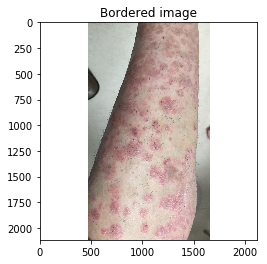

In [70]:
im = cv2.imread(filepath)
[height, width, channel] = im.shape

plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
plt.title('Bordered image')
plt.show()

#### Calculate height/width of borders

In [71]:
horizontal_border_height=0
vertical_border_width=0
for i in range(height):
    if np.all(im[i,:,:] == 255):
        horizontal_border_height += 1
    if np.all(im[:,i,:] == 255):
        vertical_border_width +=1
        
[horizontal_border_height, vertical_border_width]

[0, 923]

#### Create blank matrix using new size

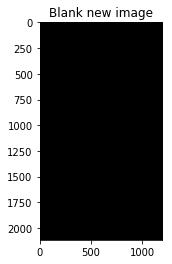

In [73]:
im_new = np.empty([height-horizontal_border_height ,width-vertical_border_width,channel])

plt.imshow(im_new)
plt.title('Blank new image')
plt.show()

#### Copy image content to new image matrix

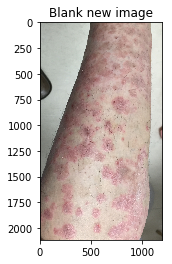

In [74]:
x_offset = math.floor(vertical_border_width/2)
y_offset = math.floor(horizontal_border_height/2)

im_new = im[y_offset:y_offset+im_new.shape[0], x_offset:x_offset+im_new.shape[1]]

plt.imshow(cv2.cvtColor(im_new, cv2.COLOR_BGR2RGB))
plt.title('Blank new image')
plt.show()

#### Save cropped image to chosen directory

In [75]:
save_dir = os.path.join('.', 'cropped', filename+'.png')
cv2.imwrite(save_dir, im_new)

True